                              Clustering
Clustering-UnSupervised learning
The method of identifying similar groups of data in a dataset is called clustering.
Clustering Methods :
                  1. Density-Based Methods :Ex:DBSCAN,OPTICS
                  2. Hierarchical Based Methods : Ex: It is divided into two category
                                                 -> Agglomerative (bottom up approach)
                                                  -> Divisive (top down approach) .
                  3. Partitioning Methods : Ex: K-means
                  4. Grid-based Methods :Ex:STING

In [24]:
import pandas as pd


In [25]:
df=pd.read_csv("Desktop/Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [26]:
df.shape

(440, 8)

In [27]:
df.drop(['Region', 'Channel'], axis = 1, inplace = True)


In [28]:
df.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [29]:
df.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [30]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
m = KMeans(n_clusters = 2)
m.fit(df)
m.labels_
df=df.values

In [35]:
from sklearn.cluster import AgglomerativeClustering as a
cluster=a(n_clusters=3,affinity='euclidean',linkage='ward')
Y=cluster.fit_predict(df)

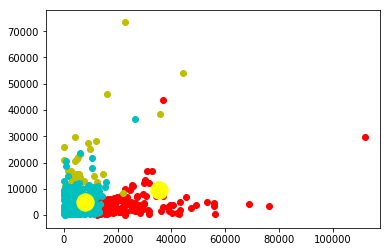

In [36]:
from matplotlib import pyplot as plt
plt.scatter(df[Y==0,0],df[Y==0,1],c='r')
plt.scatter(df[Y==1,0],df[Y==1,1],c='y')
plt.scatter(df[Y==2,0],df[Y==2,1],c='c')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='yellow',s=300)



plt.show()

Elbow Method

In [37]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)  #k means++ method is used to find the best K initial position 
                                                                    #of the the centroids

    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
wcss

[157595857165.6091,
 113217528520.90994,
 80342166920.9407,
 64855545528.211044,
 53019062599.730865,
 47268536487.10498,
 41548901634.243,
 36471327478.595474,
 32765817439.526077,
 29734145058.23706]

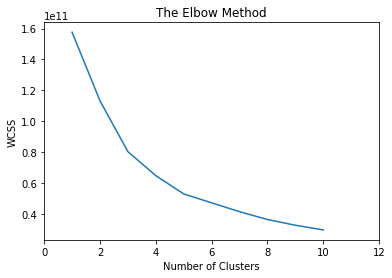

In [38]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlim(0, 12)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()